In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import plotly.express as px

In [2]:
df = pd.read_csv('data/salarios_colaboradores.csv', delimiter=';')

In [3]:
df

,dias_trabalhados,salario_recebido
0,1,552.00
1,2,768.00
2,3,1024.00
3,4,1516.00
4,5,744.00
...,...,...
57,27,625.47
58,28,1365.54
59,29,1475.97
60,30,1864.38


### Qual é o desvio padrão para a variável dias trabalhados?

In [4]:
desvio_padrão = df['dias_trabalhados'].std()
print(desvio_padrão)

9.01728758606689


### O dataset possui algum valor ausente?

In [5]:
dfnulos = df.isnull()

In [6]:
dfnulos[dfnulos.any(axis=1)]

,dias_trabalhados,salario_recebido


### Existe correlação entre as variáveis do dataset?

In [7]:
#variavel independente
x_dias_trab = df.iloc[:,0].values
x_dias_trab

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [8]:
#variavel dependente - a qual queremos predizer
y_salario_rec = df.iloc[:,1].values
y_salario_rec

array([ 552.  ,  768.  , 1024.  , 1516.  ,  744.  ,  992.  , 1360.  ,
       1980.  ,  936.  , 1216.  , 1696.  , 2444.  , 1128.  , 1440.  ,
       2032.  , 2908.  , 1320.  , 1664.  , 2368.  , 3372.  , 1512.  ,
       1888.  , 2704.  , 3836.  , 1704.  , 2112.  , 3040.  , 4300.  ,
       1896.  , 2336.  , 3376.  ,  250.  , 2512.94,  152.92, 5101.45,
        974.68,  937.14,  760.61,  428.03, 2018.38, 2346.85, 1871.11,
        515.46,  232.92,  745.17, 2550.42, 4066.94, 1179.65, 4120.58,
       5988.11, 1303.07, 2898.97,  727.31, 5406.51, 4321.3 ,  792.82,
        548.4 ,  625.47, 1365.54, 1475.97, 1864.38, 5478.7 ])

In [9]:
np.corrcoef(x_dias_trab,y_salario_rec)

array([[1.        , 0.38376138],
       [0.38376138, 1.        ]])

# Correlação

positiva: quando duas variáveis se movem na mesma direção

negativa: quando duas variáveis se movem em direções opostas

<Axes: >

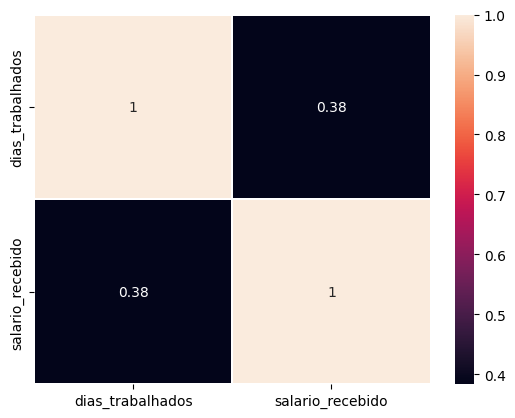

In [10]:
correlation = df.corr()

plot = sns.heatmap(correlation, annot = True, linewidths=.3)
plot


In [11]:
x_dias_trab = x_dias_trab.reshape(-1,1)
x_dias_trab

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31]])

In [12]:
y_salario_rec = y_salario_rec.reshape(-1,1)
y_salario_rec

array([[ 552.  ],
       [ 768.  ],
       [1024.  ],
       [1516.  ],
       [ 744.  ],
       [ 992.  ],
       [1360.  ],
       [1980.  ],
       [ 936.  ],
       [1216.  ],
       [1696.  ],
       [2444.  ],
       [1128.  ],
       [1440.  ],
       [2032.  ],
       [2908.  ],
       [1320.  ],
       [1664.  ],
       [2368.  ],
       [3372.  ],
       [1512.  ],
       [1888.  ],
       [2704.  ],
       [3836.  ],
       [1704.  ],
       [2112.  ],
       [3040.  ],
       [4300.  ],
       [1896.  ],
       [2336.  ],
       [3376.  ],
       [ 250.  ],
       [2512.94],
       [ 152.92],
       [5101.45],
       [ 974.68],
       [ 937.14],
       [ 760.61],
       [ 428.03],
       [2018.38],
       [2346.85],
       [1871.11],
       [ 515.46],
       [ 232.92],
       [ 745.17],
       [2550.42],
       [4066.94],
       [1179.65],
       [4120.58],
       [5988.11],
       [1303.07],
       [2898.97],
       [ 727.31],
       [5406.51],
       [4321.3 ],
       [ 7

### Aplicando algoritmo de regressão e treinando o modelo

In [13]:
previsao_salario = LinearRegression()

In [14]:
previsao_salario.fit(x_dias_trab, y_salario_rec)

LinearRegression()

In [15]:
previsao_salario.intercept_

array([1039.21045161])

In [16]:
previsao_salario.coef_

array([[59.77293548]])

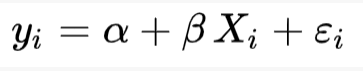

constante 	**α** = 1039.21045161

coeficiente angular 	**β** = 59.77293548

In [17]:
prev_sala = previsao_salario.predict(x_dias_trab)

In [18]:
prev_sala

array([[1098.9833871 ],
       [1158.75632258],
       [1218.52925806],
       [1278.30219355],
       [1338.07512903],
       [1397.84806452],
       [1457.621     ],
       [1517.39393548],
       [1577.16687097],
       [1636.93980645],
       [1696.71274194],
       [1756.48567742],
       [1816.2586129 ],
       [1876.03154839],
       [1935.80448387],
       [1995.57741935],
       [2055.35035484],
       [2115.12329032],
       [2174.89622581],
       [2234.66916129],
       [2294.44209677],
       [2354.21503226],
       [2413.98796774],
       [2473.76090323],
       [2533.53383871],
       [2593.30677419],
       [2653.07970968],
       [2712.85264516],
       [2772.62558065],
       [2832.39851613],
       [2892.17145161],
       [1098.9833871 ],
       [1158.75632258],
       [1218.52925806],
       [1278.30219355],
       [1338.07512903],
       [1397.84806452],
       [1457.621     ],
       [1517.39393548],
       [1577.16687097],
       [1636.93980645],
       [1696.712

Grafico

In [19]:
grafico = px.scatter(x = x_dias_trab.ravel(), y = y_salario_rec.ravel(), labels={'x':'Dias Trabalhados', 'y':'Salário Recebido'})

In [20]:
grafico.show()

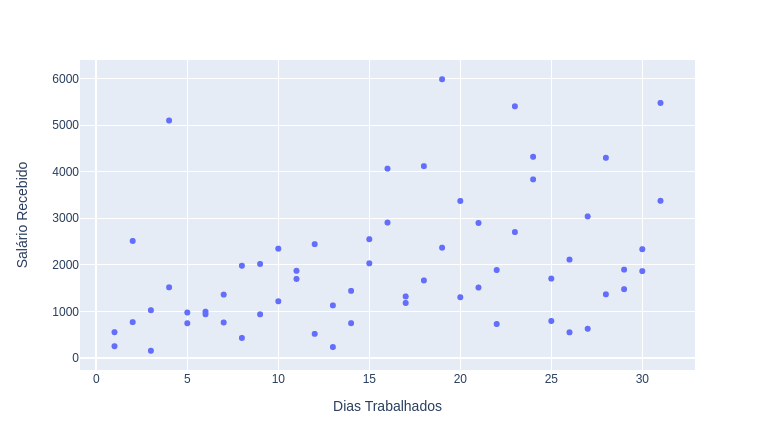

In [21]:
grafico.add_scatter(x = x_dias_trab.ravel(), y = prev_sala.ravel(), name= 'previsões')
grafico.show()

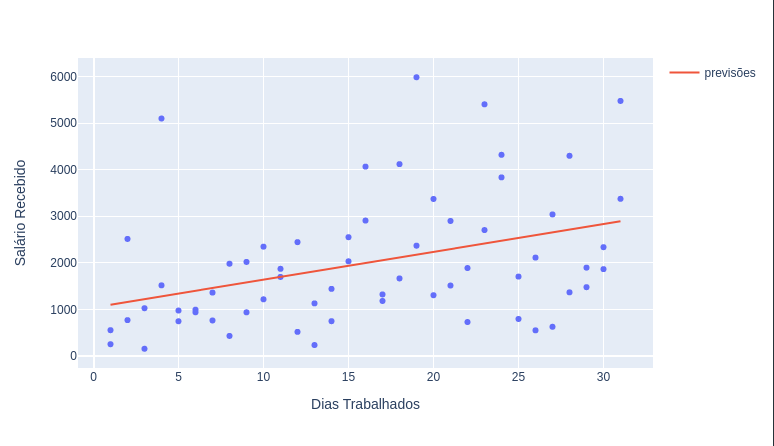

In [22]:
residuals = np.abs(y_salario_rec - prev_sala)
max_residual_idx = np.argmax(residuals)
max_residual_obs = df.loc[max_residual_idx]
diferença = (df.loc[max_residual_idx].iloc[1] - prev_sala[max_residual_idx])

print("O maior valor residual absoluto é:")
print(max_residual_obs)
print('\nDiferença absoluta de:')
print(diferença[0])


O maior valor residual absoluto é:
dias_trabalhados       4.00
salario_recebido    5101.45
Name: 34, dtype: float64

Diferença absoluta de:
3823.147806451613


valor preditivo de salario para 15 dias de trabalho 

In [23]:
qz_dias_trab = 15
previsao_salario.intercept_ + previsao_salario.coef_ * qz_dias_trab

array([[1935.80448387]])

another approch ->

In [24]:
previsao_salario.predict([[8]])

array([[1517.39393548]])

### Verificando qualidade do algoritmo
quanto mais proximo de 1 melhor

In [25]:
previsao_salario.score(x_dias_trab, y_salario_rec)

0.1472727975930357

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

Verificando o mean squared error do modelo

In [27]:
MSE = mean_squared_error(y_salario_rec, prev_sala)
MSE

1654957.0879975234

In [28]:
np.sqrt(MSE)

1286.4513546953585

Verificando o mean absolute error do modelo

In [29]:
MAE = mean_absolute_error(y_salario_rec, prev_sala)
MAE

995.988272632674